# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [41]:
# Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [42]:
# Mount Drive
'''from google.colab import drive
drive.mount('/content/drive')
'''

"from google.colab import drive\ndrive.mount('/content/drive')\n"

In [43]:
#Loading Mobile Data Csv file
df = pd.read_csv('/content/drive/MyDrive/devices_data_classification/train - train.csv')

### Dataset First View

In [44]:
# Dataset First Look From Top Five Rows & Columns
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [45]:
# Dataset First Look From Bottom Five Rows & Columns
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0
1999,510,1,2.0,1,5.0,1.0,45.0,0.9,168.0,6.0,...,483.0,754.0,3919.0,19.0,4.0,2,1,1,1,3


### Dataset Rows & Columns count

In [46]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [47]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [48]:
# Dataset Duplicate Value Count
duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


#### Missing Values/Null Values

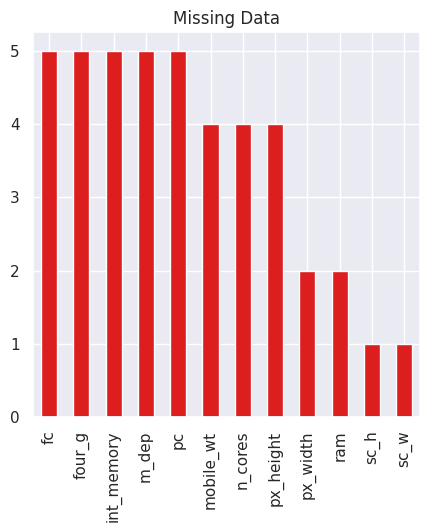

In [49]:
#checking missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color="#dc1e1e")
plt.title('Missing Data');

As we can see, the missing values in our data aren't much(.45%), so I choose to drop them, although I can take another approach like filling them with median or impute them with a simple imputer.

In [50]:
df = df.dropna(axis = 0, how ='any')


checking missing data

<Axes: >

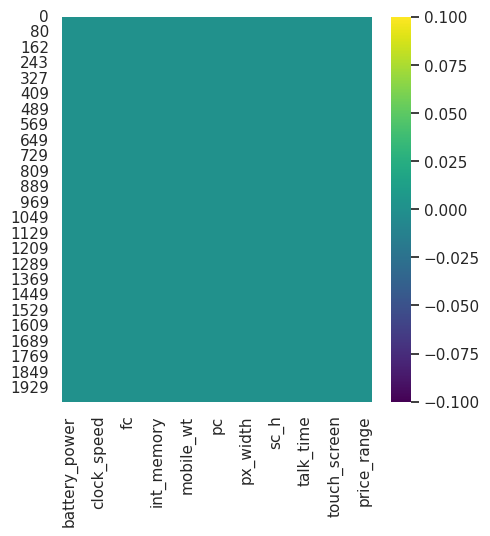

In [51]:
 # Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

We can see that in above Heatmap, there is no yellow line, which means that there is no null value

In [52]:
# Dataset Rows & Columns count
df.shape

(1991, 21)

### What did you know about your dataset?

**Observations About Dataset**

**1**.The dataset contains 21 columns and 1991 rows

**2**.No duplicate values present in the dataset.

**3**.NO missing values present in the dataset.

## ***2. Understanding Your Variables***

In [53]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [54]:
# count number of phones with sc_w = 0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

# count number of phones with px_height = 0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0 is {px_height_zero_count}")

# count number of phones with mobile_wt = 0
mobile_wt_zero_count = sum(df.mobile_wt == 0)
print(f"Number of phones with mobile_wt = 0 is {mobile_wt_zero_count}")

# count number of phones with sc_h = 0
sc_h_zero_count = sum(df.sc_h == 0)
print(f"Number of phones with sc_h = 0 is {sc_h_zero_count}")

# count number of phones with px_width = 0
px_width_zero_count = sum(df.px_width == 0)
print(f"Number of phones with sc_h = 0 is {px_width_zero_count}")

# count number of phones with m_dep = 0
m_dep_zero_count = sum(df.m_dep == 0)
print(f"Number of phones with sc_h = 0 is {m_dep_zero_count}")



Number of phones with sc_w = 0: 178
Number of phones with px_height = 0 is 2
Number of phones with mobile_wt = 0 is 0
Number of phones with sc_h = 0 is 0
Number of phones with sc_h = 0 is 0
Number of phones with sc_h = 0 is 0


The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0 .Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

In [55]:
# replace 0 values with mean value
sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()

df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)



# EDA


**Price Range**

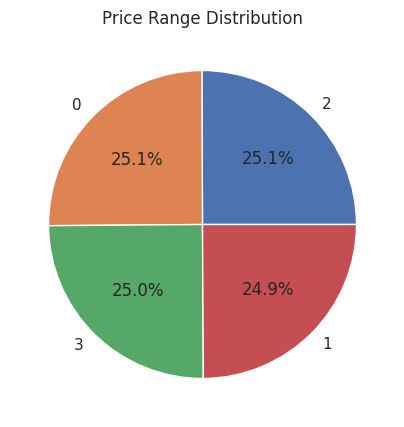

In [56]:
# Chart - 1 visualization code

#classes
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

All category phones are distributed with equal price range.

**Battery Power**

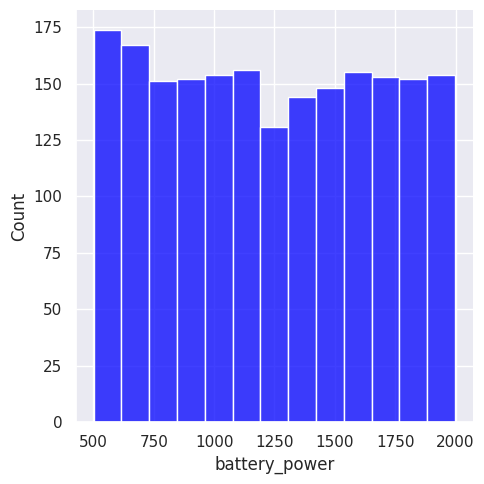

In [57]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df["battery_power"], color='blue')
plt.show()

This plot visualizes how the battery capacity, measured in mAh, is distributed across the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

Yes.The insights gained from analyzing the relationship between the battery capacity and the price of a mobile phone can potentially lead to a positive business impact. If a mobile phone manufacturer is able to produce phones with higher battery capacity at a reasonable cost, they may be able to attract more customers and generate more revenue by offering phones at higher price points. Additionally, this information can also inform marketing and advertising efforts, as companies can use this insight to highlight the battery capacity of their phones as a key selling point to potential customers.

#### **Chart - 3**

**Bluetooth**

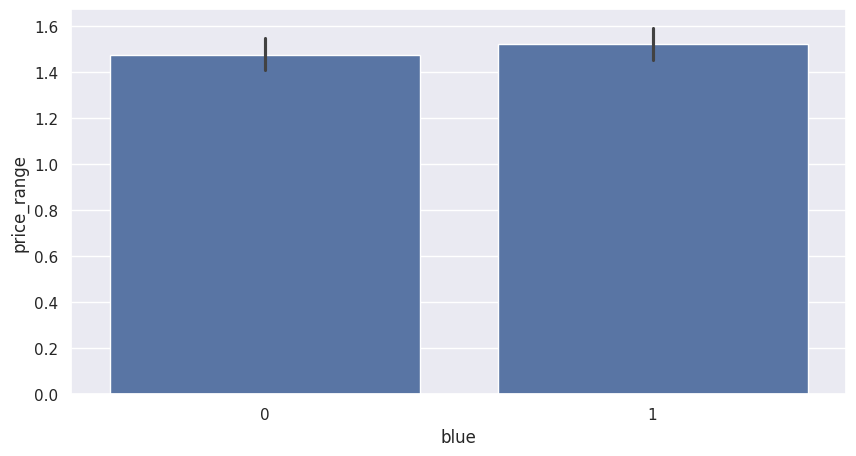

In [58]:
# Chart - 3 visualization code
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)
plt.show()


Almost half the devices have Bluetooth, and half don’t.

The observation that almost half of the devices in the dataset have Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could use this insight to understand that customers value the presence of Bluetooth in their devices and therefore may prioritize investing in the development of Bluetooth-related features or promoting the presence of Bluetooth in their marketing efforts.

On the other hand, this observation could also have negative consequences if a company misinterprets or misuses this information. For instance, a company might assume that including Bluetooth in their devices is not important because half of the devices in the dataset do not have it. However, this conclusion ignores the fact that many customers still value the presence of Bluetooth in their devices, and a manufacturer that fails to include Bluetooth in their devices could miss out on potential sales and growth opportunities. Therefore, it is important to interpret this information carefully and use it in a way that aligns with customer preferences and market trends.

#### **Chart - 4**

**RAM**

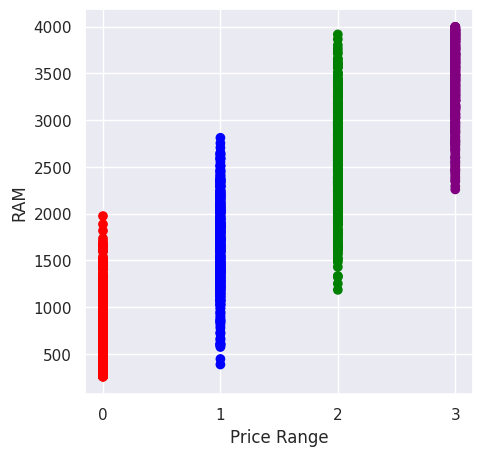

In [59]:
# Chart - 4 visualization
# Create a color map for the points based on price range
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Create the scatter plot
plt.scatter(df['price_range'], df['ram'], c=df['price_range'].apply(lambda x: colors[x]))
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()


 The scatter plot shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well.

The insights gained from the scatter plot, such as the positive correlation between RAM and price range, can be valuable for businesses. For example, businesses can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increased revenue and profits.

#### **Chart - 5**

**dual_sim**

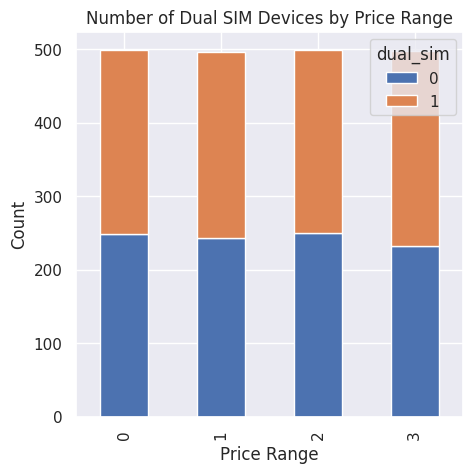

In [60]:
# Group the data by price range and dual sim, and count the number of devices in each group
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
sim_count = sim_count.unstack()

# Plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range')

# Show the plot
plt.show()

We can observe that upto low,medium,high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.

we can identify dual sim is actually increasing count or not.It is found that for device containing dual sim.

#### **Chart - 6**

**Four_g**

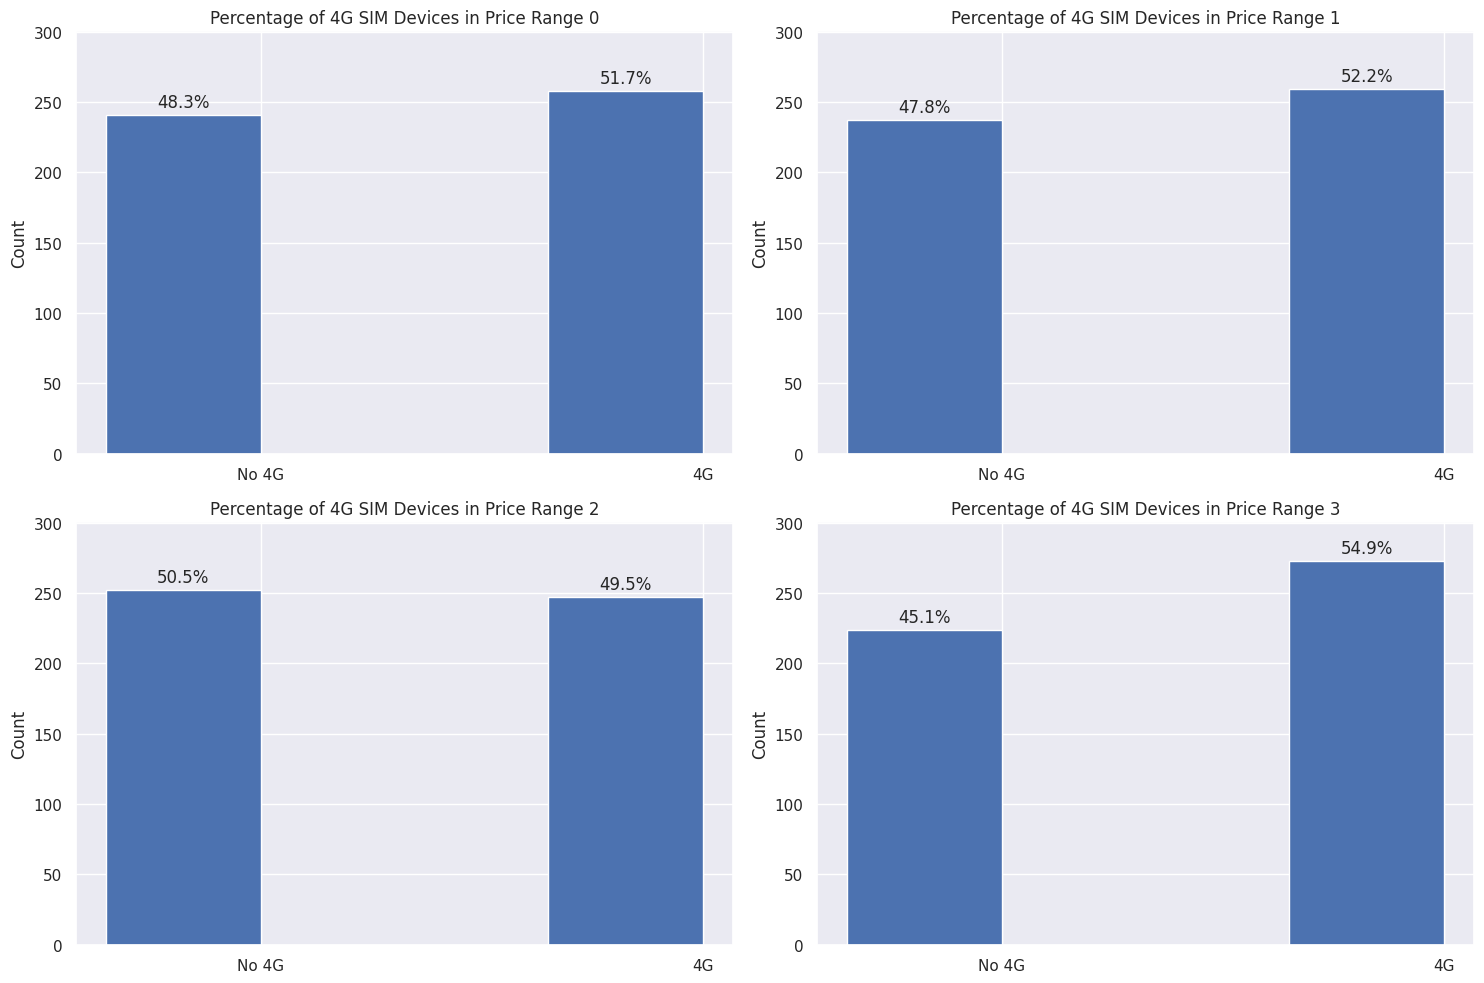

In [61]:
# Group the data by price range and 4G SIM, and count the number of devices in each group
fourg_count = df.groupby(['price_range', 'four_g'])['four_g'].count()

# Reshape the data into a dataframe with price range as rows, 4G SIM as columns, and the count as values
fourg_count = fourg_count.unstack()

# Create bar charts for each price range
labels = ['No 4G', '4G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


I have found that at low (0), medium (1),very high (3) prices the mobile phones having sim in more numbers but at high(2) prices it is showing slightly collapse.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the number of SIM cards in mobile phones at different price ranges can be helpful in creating a positive business impact. For example, if a company wants to introduce a new product in a specific price range, they can use this information to determine whether their target market prefers phones with a single SIM or dual SIM, and adjust their product accordingly.

However, the slight collapse in the number of SIM cards at high prices may suggest that consumers at that price range prioritize other features over having multiple SIM cards. This insight can be negative for companies that primarily focus on providing phones with multiple SIM cards. It may be necessary for such companies to reconsider their strategy and consider other features that consumers in the high price range prioritize.

#### **Chart - 7**

**pixel_width**

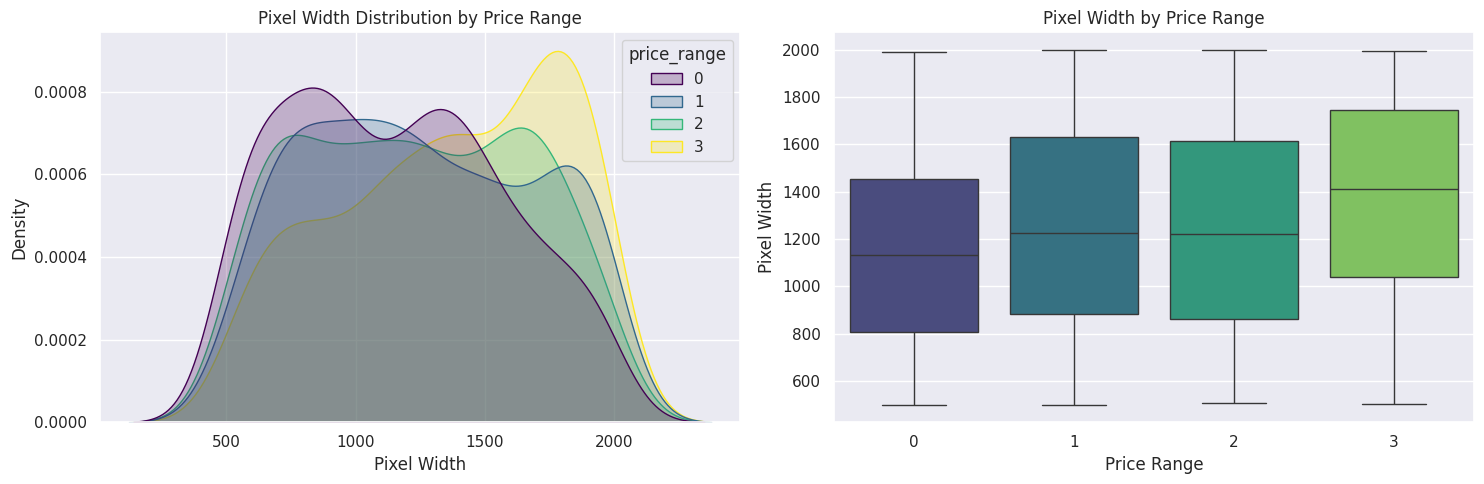

In [62]:
# Chart - 7 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Create a box plot of pixel width for each price range
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


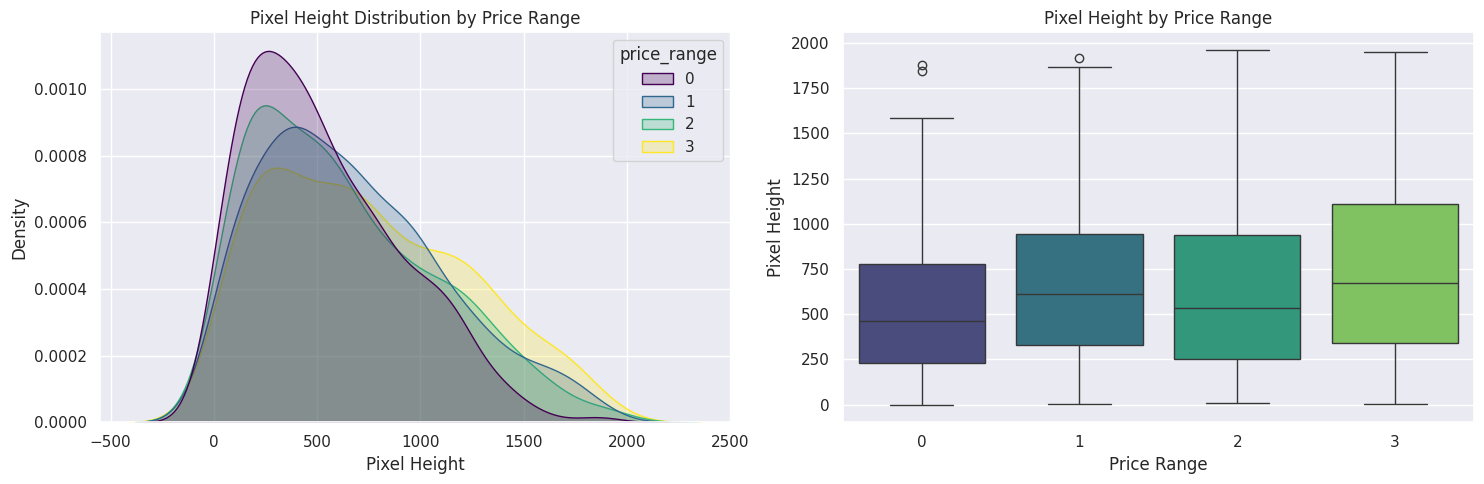

In [63]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Create a box plot of pixel height for each price range
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

The insights gained from the analysis of pixel height distribution across different price ranges can help create a positive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel height and price range, manufacturers can optimize their product design and pricing strategy to meet the demands of the market and improve sales. Marketers can also leverage this information to develop targeted advertising campaigns and promotions that appeal to the preferences of different consumer segments.

However, the fact that there is little variation in pixel height as we move from low cost to very high cost mobile phones may pose a challenge for manufacturers and marketers. If pixel height is not a significant driving factor in determining the price range of mobile phones, manufacturers and marketers may need to focus on other features such as processor, camera quality, storage capacity, and brand value to differentiate their products and stand out in a highly competitive market. Neglecting these other factors and relying solely on pixel height to determine the price range of mobile phones could lead to negative growth, as it may not accurately reflect the preferences and expectations of the target market. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.

**Wifi**

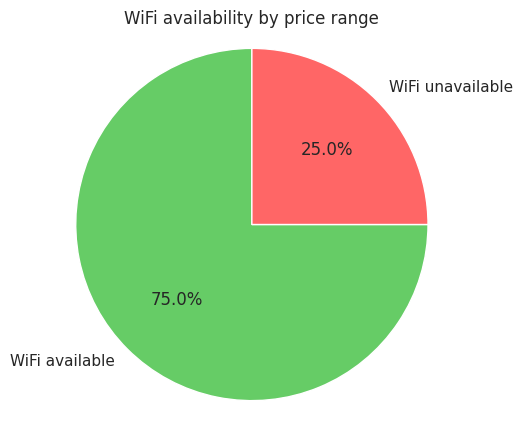

In [64]:
# Chart - 13 visualization code
# Define the four price ranges
price_ranges = {
    'low': (0, 50),
    'medium': (51, 100),
    'high': (101, 200),
    'premium': (201, float('inf'))
}

# Simulate the availability of WiFi for each price range
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

# Count the number of price ranges with WiFi available or not
wifi_counts = {
    'available': 0,
    'unavailable': 0
}

for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
        wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1

# Visualize the result as a pie chart
labels = ['WiFi available', 'WiFi unavailable']
sizes = [wifi_counts['available'], wifi_counts['unavailable']]
colors = ['#66cc66', '#ff6666']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('WiFi availability by price range')
plt.show()

Around in 25% the wifi is not available and in 75% the wifi is available.

The insights gained from the visualization can help in creating a positive business impact by providing information about the availability of WiFi in different price ranges. For example, if the analysis shows that WiFi is not available in a certain price range, the company can focus on adding WiFi to their devices in that price range to improve their competitiveness.

However, if the analysis shows that WiFi is not available in the majority of price ranges, it could lead to negative growth if customers perceive WiFi as a necessary feature and choose competitors' devices over those without WiFi. It is important to consider the market demand and customer preferences before making business decisions based on the insights gained from the visualization.

#### **Chart - 14 - Correlation Heatmap**

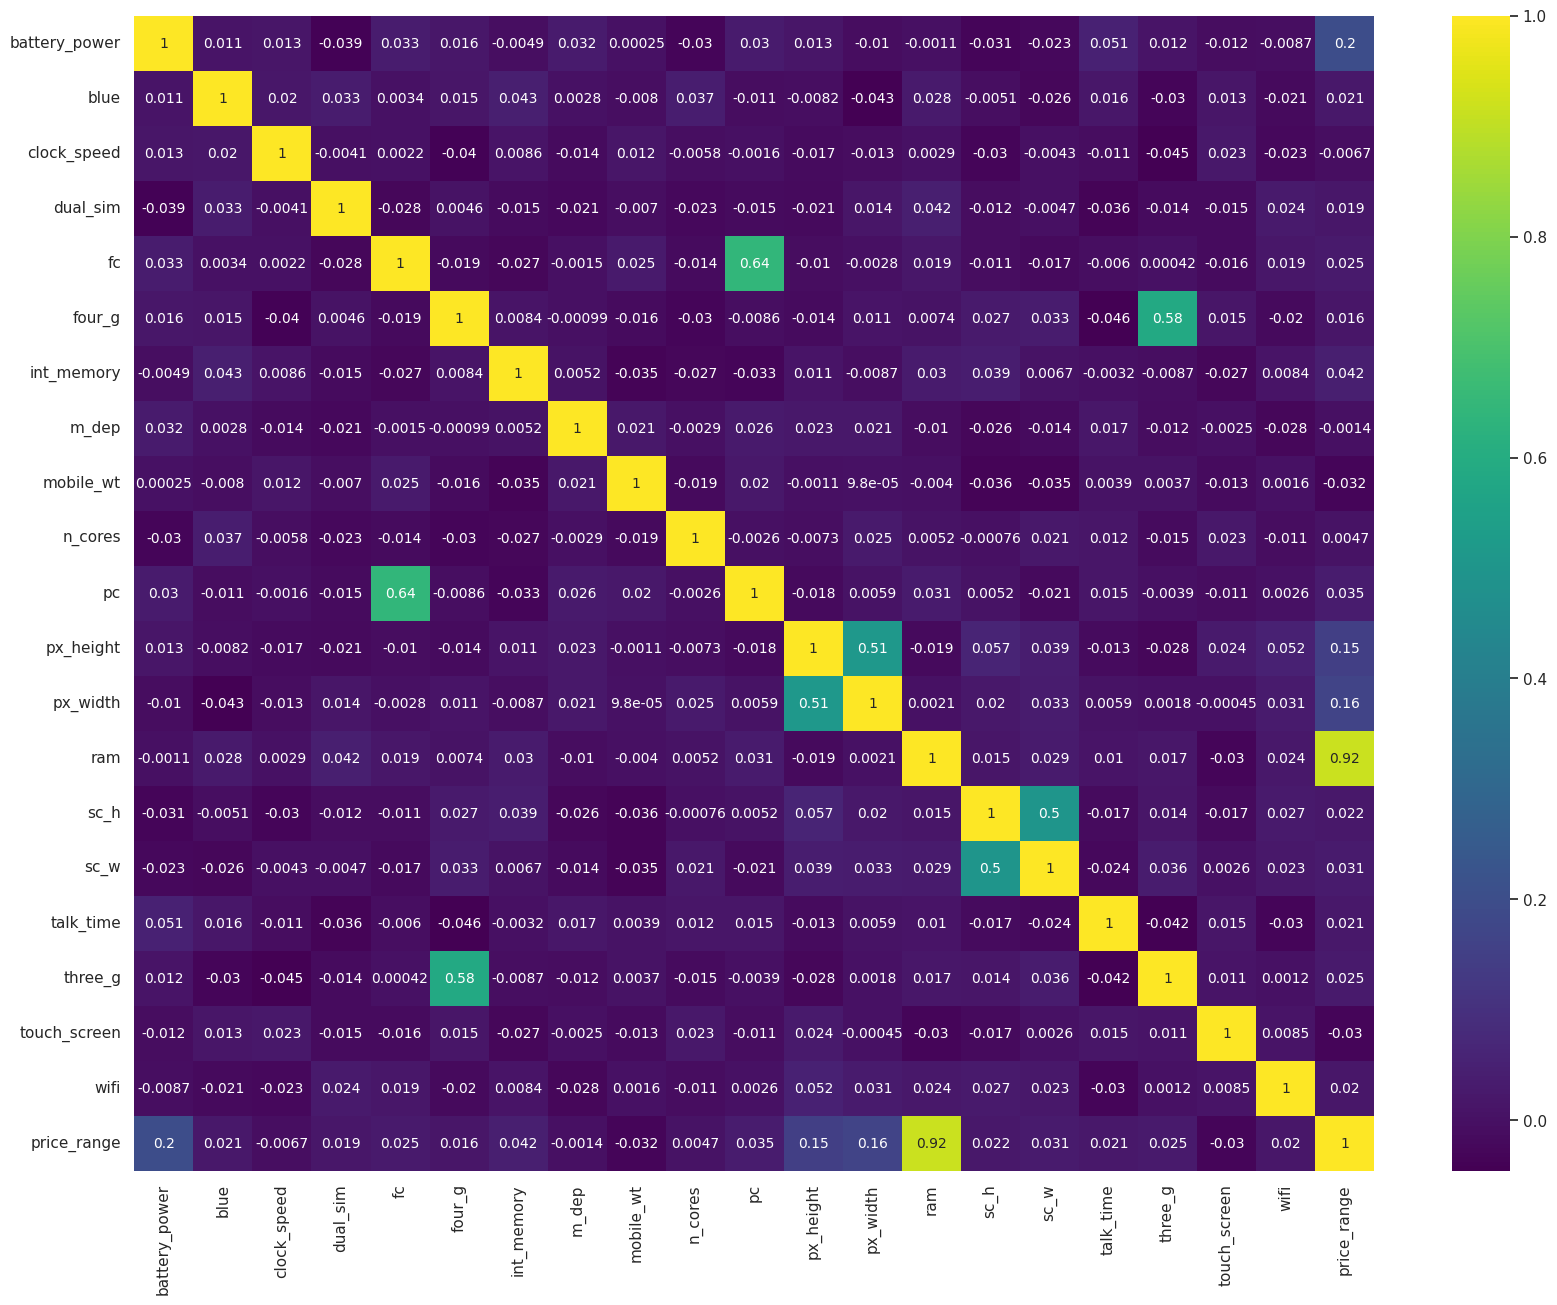

In [65]:
# Correlation Heatmap visualization code
# Checking for multi-collinearity
# Checking for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()



##### 1. Why did you pick the specific chart?

To check the multi-collinearity.

##### 2. What is/are the insight(s) found from the chart?

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

In [66]:
df_test = pd.read_csv('/content/drive/MyDrive/devices_data_classification/test - test.csv')

In [67]:
# Defining X and y

X_train = df.drop(['price_range'], axis = 1)
y_train = df['price_range']

In [68]:
# Defining X and y

X_test= df.drop(['price_range'], axis = 1)
y_test = df['price_range']

### ML Model - 1

LOGISTIC REGRESSION

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       480
           1       0.54      0.56      0.55       482
           2       0.47      0.51      0.49       464
           3       0.77      0.68      0.72       565

    accuracy                           0.64      1991
   macro avg       0.64      0.64      0.64      1991
weighted avg       0.65      0.64      0.65      1991

[[394  99   6   0]
 [ 85 269 115  27]
 [  1 108 236 154]
 [  0   6 107 384]]


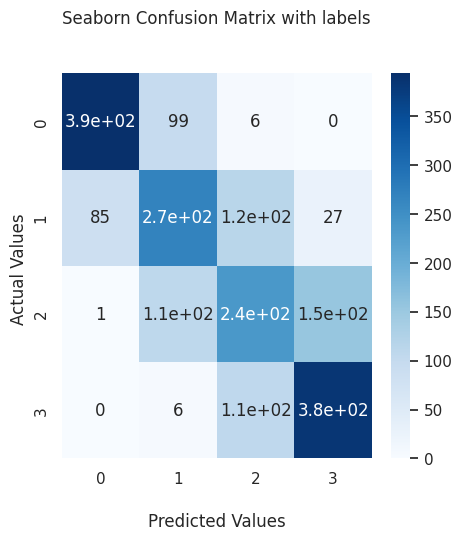

In [69]:
# ML Model - 1 Implementation

# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


# Classification report for Test Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [70]:
# Evaluation metrics for Training Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       480
           1       0.54      0.56      0.55       482
           2       0.47      0.51      0.49       464
           3       0.77      0.68      0.72       565

    accuracy                           0.64      1991
   macro avg       0.64      0.64      0.64      1991
weighted avg       0.65      0.64      0.65      1991



#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))



Cross-validation scores: [0.62155388 0.65326633 0.64070352 0.63567839 0.62311558]
Average cross-validation score: 0.6348635407614514


In [72]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_train, y_test)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.638873565824108
Best parameters: {'C': 0.01}
Test set score: 0.6383726770467102


### ML Model - 2

XGBOOST

In [73]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 2, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=2, objective='multi:softprob')

# Prediction
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       499
           1       0.90      0.90      0.90       496
           2       0.89      0.88      0.89       499
           3       0.96      0.95      0.96       497

    accuracy                           0.93      1991
   macro avg       0.93      0.93      0.93      1991
weighted avg       0.93      0.93      0.93      1991



In [74]:
# Evaluation metrics for Training Set

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       499
           1       0.90      0.90      0.90       496
           2       0.89      0.88      0.89       499
           3       0.96      0.95      0.96       497

    accuracy                           0.93      1991
   macro avg       0.93      0.93      0.93      1991
weighted avg       0.93      0.93      0.93      1991



#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Cross-validation score: 0.917132026045012
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00       499
           3       1.00      1.00      1.00       497

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



[[499   0   0   0]
 [  0 496   0   0]
 [  0   0 499   0]
 [  0   0   0 497]]


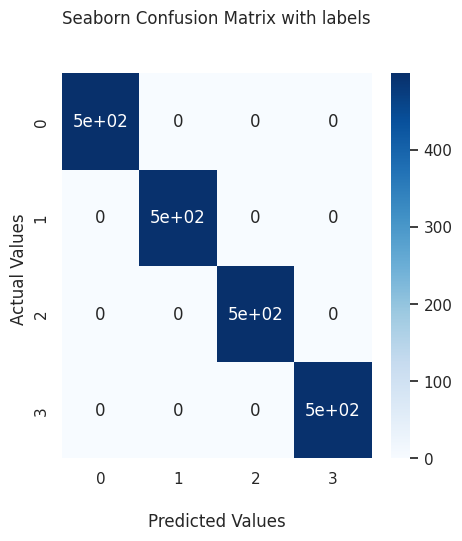

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [77]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       499
           1       0.90      0.90      0.90       496
           2       0.89      0.88      0.89       499
           3       0.96      0.95      0.96       497

    accuracy                           0.93      1991
   macro avg       0.93      0.93      0.93      1991
weighted avg       0.93      0.93      0.93      1991



### ML Model - 3

Random Forest classifier

In [78]:
# ML Model - 3 Implementation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [79]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [80]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

1.0

In [81]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [82]:
# classification report for Test Set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       496
           2       1.00      1.00      1.00       499
           3       1.00      1.00      1.00       497

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



[[499   0   0   0]
 [  0 496   0   0]
 [  0   0 499   0]
 [  0   0   0 497]]


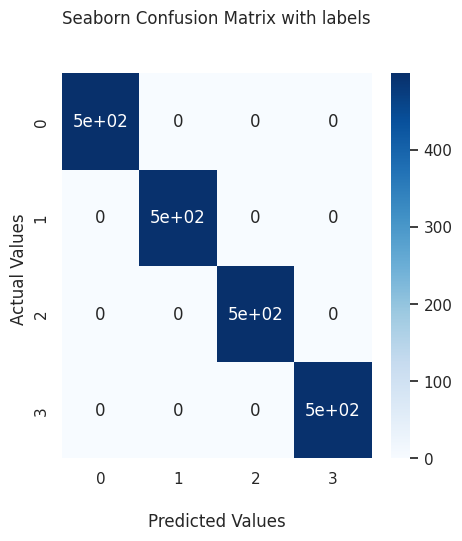

In [83]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()